# CASE I

## A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

- 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

- 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

- 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

- 1.4 Are there any outliers in the data?

- 1.5 On the basis of this report, what are the recommendations?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.stats.power import TTestIndPower
import os
sns.set(color_codes=True)

In [2]:
df1 = pd.read_csv("C:\\Users\\archy\\Downloads\\Wholesale Customer (3).csv")

In [3]:
df1.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [4]:
df2 = df1.describe()
df2

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
df1.groupby("Region").count()

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,,
Lisbon,77,77,77,77,77,77,77,77
Oporto,47,47,47,47,47,47,47,47
Other,316,316,316,316,316,316,316,316


In [7]:
 df1["Total"] = df1["Fresh"]+df1["Milk"]+df1["Grocery"]+df1["Frozen"]+df1["Detergents_Paper"]+df1["Delicatessen"]

In [8]:
df1.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
5,6,Retail,Other,9413,8259,5126,666,1795,1451,26710
6,7,Retail,Other,12126,3199,6975,480,3140,545,26465
7,8,Retail,Other,7579,4956,9426,1669,3321,2566,29517
8,9,Hotel,Other,5963,3648,6192,425,1716,750,18694
9,10,Retail,Other,6006,11093,18881,1159,7425,2098,46662


In [9]:
df1.groupby("Region")["Total"].min()

Region
Lisbon    4925
Oporto    4129
Other      904
Name: Total, dtype: int64

In [10]:
df1.groupby("Region")["Total"].max()

Region
Lisbon    107155
Oporto    130877
Other     199891
Name: Total, dtype: int64

### 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [11]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df1.Delicatessen),stats.skew(df1.Detergents_Paper),stats.skew(df1.Fresh),stats.skew(df1.Frozen),stats.skew(df1.Grocery),stats.skew(df1.Milk)]},
                        index=['Delicatessen','Detergents_Paper','Fresh','Frozen','Grocery','Milk'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Delicatessen,11.113534
Detergents_Paper,3.619458
Fresh,2.552583
Frozen,5.887826
Grocery,3.575187
Milk,4.039922


### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

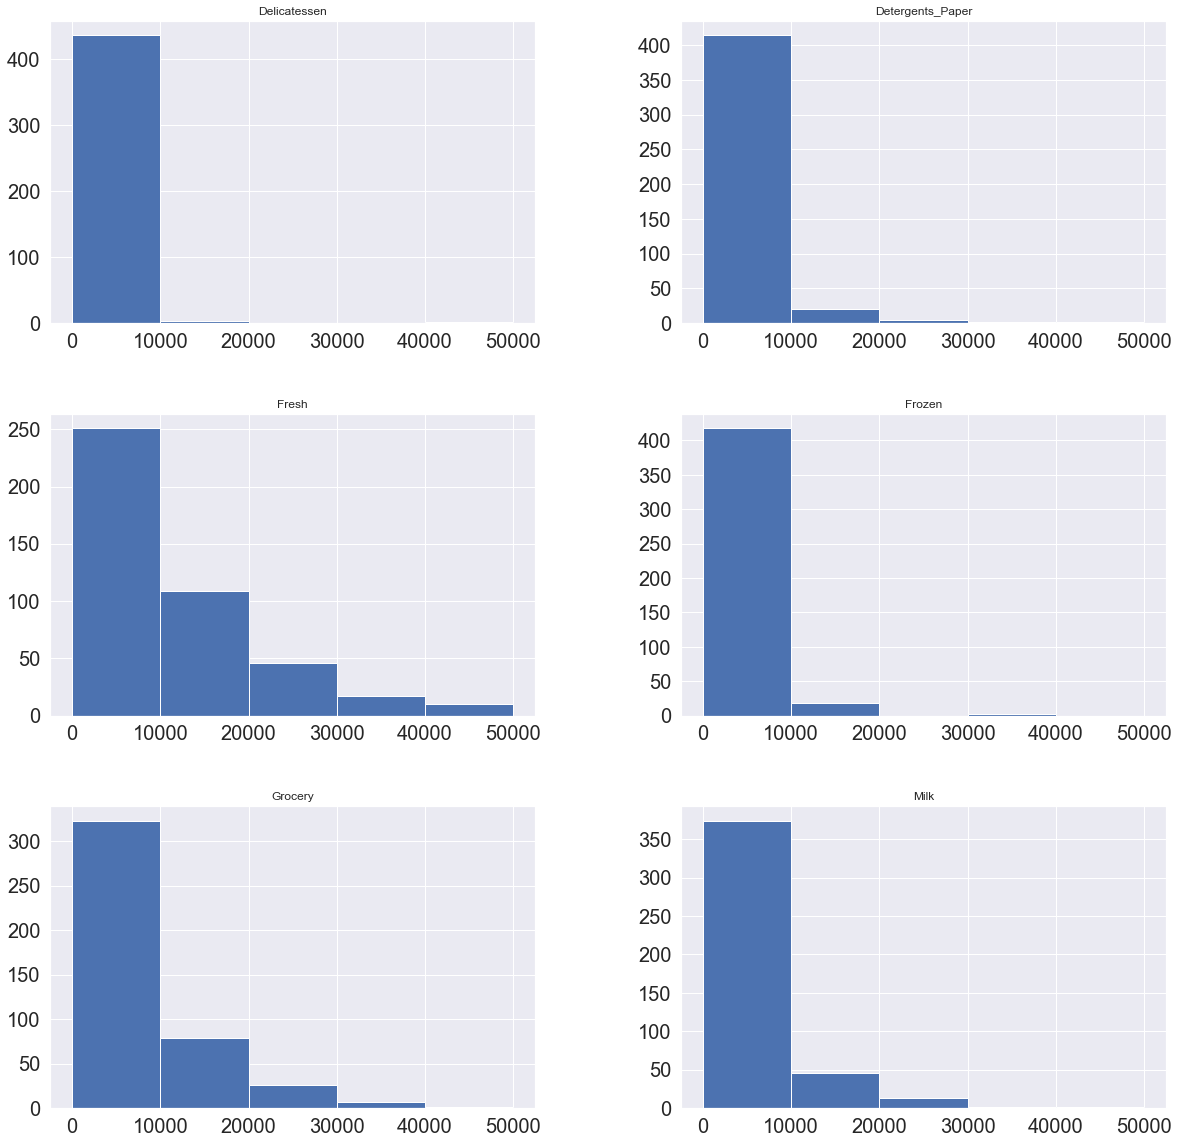

In [12]:
df1.hist(column = ["Delicatessen","Detergents_Paper","Fresh","Frozen","Grocery","Milk"] ,xlabelsize=20, ylabelsize = 20, bins = [0,10000,20000,30000,40000,50000],figsize = (20,20));

###### Inconsistency of behavior is shown in delicatessen and Frozen items. Frozen items are dropping and picking slightly at 30000. Whereas delicatessen are drastically dropping after 10000. we see that Fresh, Grocery and milk showing consistent behavor and dropping ar range.
- we can even see in the following heatmap the correlation between the items. even there some items have good correlation and they have been bought together frequently.

In [13]:
cor = df1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].corr()
cor

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


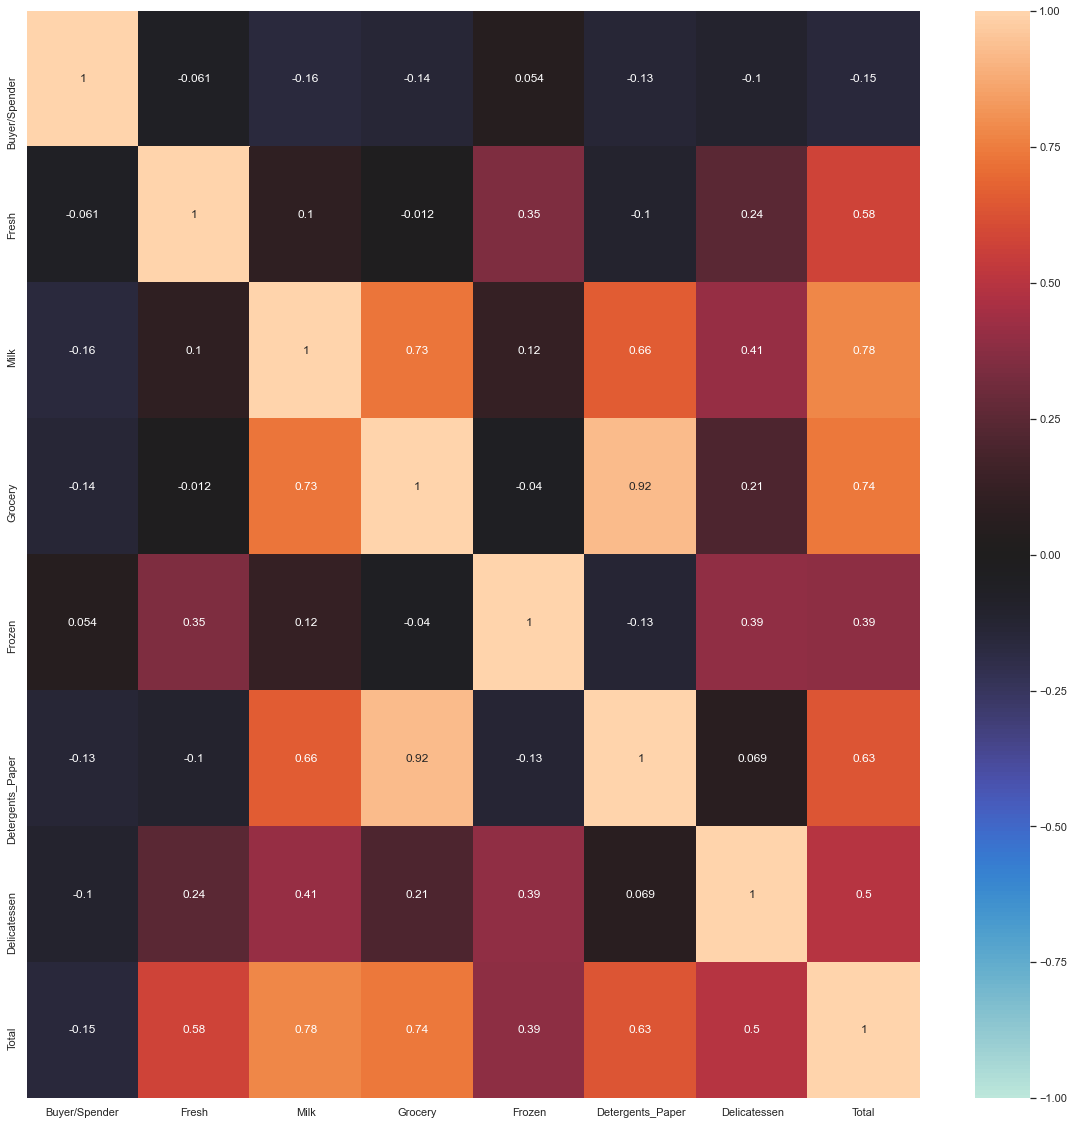

In [14]:
cor=df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1, center = 0)
plt.show()

### 1.4 Are there any outliers in the data?

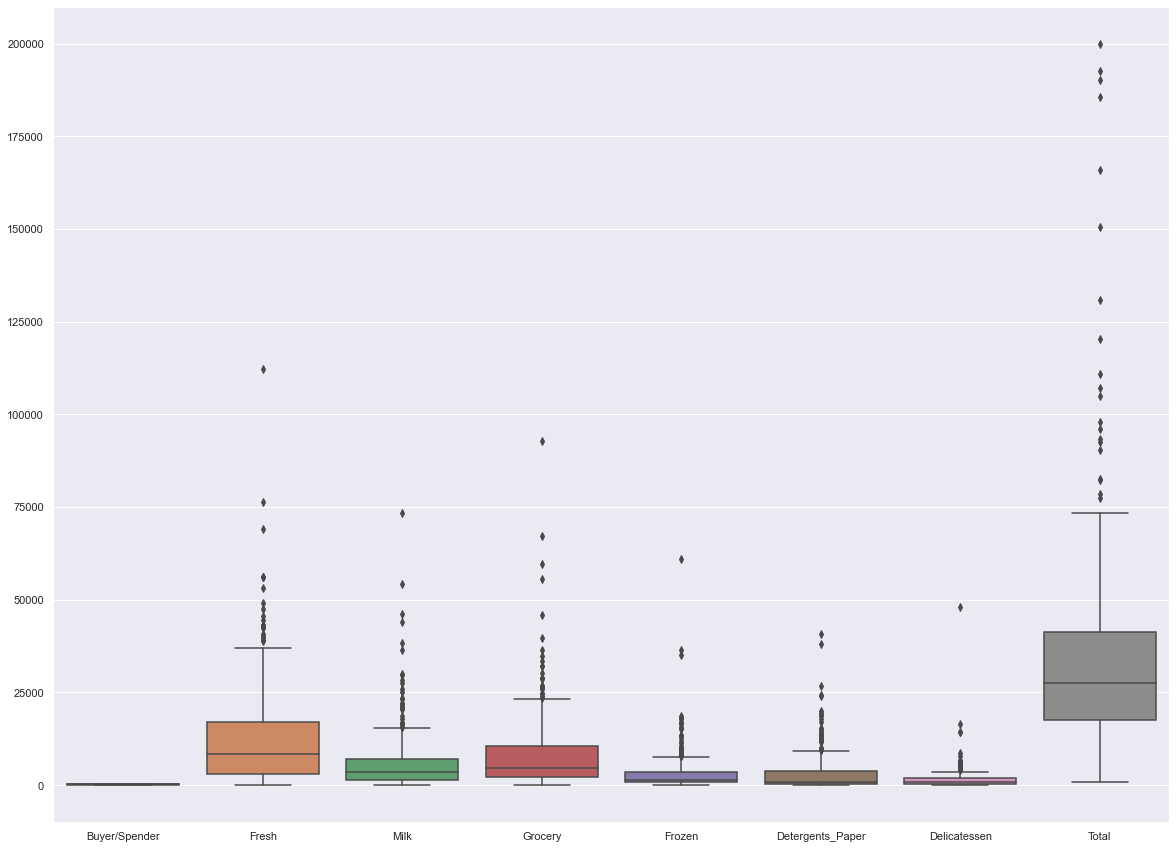

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df1)
plt.show()

- There are outliers in data.
- in the items like fresh and Grocery they are bit outlined.

# CASE II
#### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates

In [16]:
df_survey=pd.read_csv('C:\\Users\\archy\\Downloads\\Survey-1 (2).csv')

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [17]:
df_survey.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [18]:
df_survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [19]:
df_Conti1=pd.crosstab(df_survey["Gender"],df_survey["Major"], margins = True)
df_Conti1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [20]:
df_Conti2=pd.crosstab(df_survey["Gender"],df_survey["Grad Intention"], margins = True)
df_Conti2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [21]:
df_Conti3=pd.crosstab(df_survey["Gender"],df_survey["Employment"], margins = True)
df_Conti3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [22]:
df_Conti4=pd.crosstab(df_survey["Gender"],df_survey["Computer"], margins = True)
df_Conti4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [23]:
df_survey["Gender"].value_counts()


Female    33
Male      29
Name: Gender, dtype: int64

In [24]:
Female = 33
Male = 29
Total_value=Female+Male
Total_value

62

In [25]:
Male = 29
Total_value = 62
prob_male_student = round(Male/Total_value,4)*100
print('Probability of that randomly selected CMSU student will be Male is %1.1f' % prob_male_student +'%')

Probability of that randomly selected CMSU student will be Male is 46.8%


In [26]:
Female = 33
Total_value = 62
prob_female_student = round(Female/Total_value,4)*100
print('Probability of that randomly selected CMSU student will be Female is %1.1f' % prob_female_student +'%')

Probability of that randomly selected CMSU student will be Female is 53.2%


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [27]:
account = 4
CIS = 1
Eco_fin = 4
Int_bus = 2
Mgt = 6
Others  = 4
Retailing = 5
Undecided = 3
Total = 29
Prob_male_account = round(account/Total,4)*100
print("Probability of having male in Accounting major is %1.1f"  % Prob_male_account +'%')

Probability of having male in Accounting major is 13.8%


In [28]:
Prob_male_CIS = round(CIS/Total,4)*100
print("Probability of having male in CIS major is %1.1f"  % Prob_male_CIS +'%')

Probability of having male in CIS major is 3.5%


In [29]:
Prob_male_Eco_fin = round(Eco_fin/Total,2)*100
print("Probability of having male in Economics and Finance major is %1.1f"  % Prob_male_Eco_fin +'%')

Probability of having male in Economics and Finance major is 14.0%


In [30]:
Prob_male_Int_bis = round(Int_bus/Total,4)*100
print("Probability of having male in International Business major is %1.1f"  % Prob_male_Int_bis +'%')

Probability of having male in International Business major is 6.9%


In [31]:
Prob_male_mgt = round(Mgt/Total,4)*100
print("Probability of having male in Management major is %1.1f"  % Prob_male_mgt +'%')

Probability of having male in Management major is 20.7%


In [32]:
Prob_male_Others = round(Others/Total,4)*100
print("Probability of having male in Others major is %1.1f"  % Prob_male_Others +'%')

Probability of having male in Others major is 13.8%


In [33]:
Prob_male_rel_mkt = round(Retailing/Total,4)*100
print("Probability of having male in Retailing and Marketing major is %1.1f"  % Prob_male_rel_mkt +'%')

Probability of having male in Retailing and Marketing major is 17.2%


In [34]:
Prob_male_not_decided = round(Undecided/Total,4)*100
print("Probability of having male who did nto decide their major is %1.1f"  % Prob_male_not_decided +'%')

Probability of having male who did nto decide their major is 10.3%


In [35]:
account_f = 3
CIS_f = 3
Eco_fin_f = 7
Int_bus_f = 4
Mgt_f = 4
Others_f  = 3
Retailing_f = 9
Undecided_f = 0
Total = 33
Prob_female_account = round(account_f/Total,4)*100
print("Probability of having Female in Accounting major is %1.1f"  % Prob_female_account +'%')

Probability of having Female in Accounting major is 9.1%


In [36]:
Prob_female_CIS = round(CIS_f/Total,4)*100
print("Probability of having Female in CIS major is %1.1f"  % Prob_female_CIS +'%')

Probability of having Female in CIS major is 9.1%


In [37]:
Prob_female_Eco_fin = round(Eco_fin_f/Total,4)*100
print("Probability of having Female in Economics and Finance major is %1.1f"  % Prob_female_Eco_fin +'%')

Probability of having Female in Economics and Finance major is 21.2%


In [38]:
Prob_female_Int_bus = round(Int_bus_f/Total,4)*100
print("Probability of having Female in International business major is %1.1f"  % Prob_female_Int_bus +'%')

Probability of having Female in International business major is 12.1%


In [39]:
Prob_female_Mgt = round(Mgt_f/Total,4)*100
print("Probability of having Female in Management major is %1.1f"  % Prob_female_Mgt +'%')

Probability of having Female in Management major is 12.1%


In [40]:
Prob_female_Others = round(Others_f/Total,4)*100
print("Probability of having Female in Others major is %1.1f"  % Prob_female_Others +'%')

Probability of having Female in Others major is 9.1%


In [41]:
Prob_female_Retailing = round(Retailing_f/Total,4)*100
print("Probability of having Female in Retailing major is %1.1f"  % Prob_female_Retailing +'%')

Probability of having Female in Retailing major is 27.3%


In [42]:
Prob_female_Undecided = round(Undecided_f/Total,4)*100
print("Probability of having Females yet to decide their Major is %1.1f"  % Prob_female_Undecided +'%')

Probability of having Females yet to decide their Major is 0.0%


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [43]:
df_Conti2=pd.crosstab(df_survey["Gender"],df_survey["Grad Intention"], margins = True)
df_Conti2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [44]:
Tot_int_grad = 28
Male_int_grad = 17
prob_male_int_grad = round(Male_int_grad/Tot_int_grad, 4)*100
print("The Probability that the student intent to gradute and is male is %1.1f" %prob_male_int_grad + '%')

The Probability that the student intent to gradute and is male is 60.7%


In [45]:
df_Conti4=pd.crosstab(df_survey["Gender"],df_survey["Computer"], margins = False)
df_Conti4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [46]:
Tot_laptop = 55
Female_laptop = 29
prob_female_laptop = round(Female_laptop/Tot_laptop, 4)*100
print("The Probability that the student is having a Laptop and is Female is %1.1f" %prob_female_laptop + '%')

The Probability that the student is having a Laptop and is Female is 52.7%


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [47]:
df_Conti3=pd.crosstab(df_survey["Gender"],df_survey["Employment"], margins = False)
df_Conti3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [48]:
Tot_students = 62
Male_students = 29
Full_time_employment = 10
prob_stud_male = round(Male_students/Tot_students, 4)*100
prob_stud_full_emp = round(Full_time_employment/Tot_students, 4)*100
print("The Probability that a randomly chosen student is either male is %1.1f " %prob_stud_male +'%',"or has full time employment is %1.1f " %prob_stud_full_emp +'%')

The Probability that a randomly chosen student is either male is 46.8 % or has full time employment is 16.1 %


In [49]:
df_Conti1=pd.crosstab(df_survey["Gender"],df_survey["Major"], margins = True)
df_Conti1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [50]:
Tot_fem_student = 33
fem_mgt = 4
fem_int_bis = 4
prob_fem_mgt = round(fem_mgt/Tot_fem_student, 4)*100
prob_fem_int_bus = round(fem_int_bis/Tot_fem_student,4)*100
print("The probability that a randomply chosen female student is either majoring in International business is %1.1f " %prob_fem_int_bus + '%', "or majoring in management is %1.1f "%prob_fem_mgt + '%')

The probability that a randomply chosen female student is either majoring in International business is 12.1 % or majoring in management is 12.1 %


### 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


In [51]:
df_Conti6=pd.crosstab(df_survey["Gender"],df_survey["Grad Intention"], margins = True)
df_Conti6

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [52]:
fem_grad =  11
Tot_ind_y_n = 28
male_grad = 17
prob_ind_fem_grad = round(fem_grad/Tot_ind_y_n, 4)*100
prob_ind_male_grad = round(male_grad/Tot_ind_y_n, 4)*100
print("Probability of intention of female graduate is %1.1f "%prob_ind_fem_grad +'%', "and Probability of intention of male graduate is %1.1f "%prob_ind_male_grad +'%',". Hence it can be concluded that graduate intention and being female are two independent events")

Probability of intention of female graduate is 39.3 % and Probability of intention of male graduate is 60.7 % . Hence it can be concluded that graduate intention and being female are two independent events


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data

2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [53]:
df_survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [54]:
mean_GPA = 3.12
print("If the student choosen randomly the probability of his/her GPA being less than 3 is ",round(stats.poisson.cdf(2,3.12),2)*100,'%')

If the student choosen randomly the probability of his/her GPA being less than 3 is  40.0 %


In [55]:
df_survey.Gender.value_counts("Salary")

Female    0.532258
Male      0.467742
Name: Gender, dtype: float64

In [56]:
df_survey_male= df_survey[df_survey['Gender'].str.contains("Male")]
df_survey_male.mean()

ID                    26.724138
Age                   21.172414
GPA                    3.082759
Salary                48.275862
Social Networking      1.620690
Satisfaction           4.000000
Spending             516.034483
Text Messages        256.206897
dtype: float64

In [57]:
df_survey_male.std()

ID                    15.322478
Age                    1.536902
GPA                    0.355637
Salary                10.793174
Social Networking      0.941647
Satisfaction           1.195229
Spending             239.245015
Text Messages        219.067240
dtype: float64

In [58]:
mean_salary_male =48.27
std_salary_male = 10.79
print("If male is chosen randomly the probability of his salary being 50 or more is ",1-stats.norm.cdf(50,48.27,10.79))

If male is chosen randomly the probability of his salary being 50 or more is  0.4363091294876582


In [59]:
df_survey_female= df_survey[df_survey['Gender'].str.contains("Female")]
df_survey_female.mean()

ID                    35.696970
Age                   21.090909
GPA                    3.169697
Salary                48.787879
Social Networking      1.424242
Satisfaction           3.515152
Spending             452.121212
Text Messages        237.424242
dtype: float64

In [60]:
df_survey_female.std()

ID                    19.396335
Age                    1.354706
GPA                    0.396457
Salary                13.272405
Social Networking      0.751262
Satisfaction           1.202113
Spending             204.584298
Text Messages        213.348018
dtype: float64

In [61]:
mean_salary_female =48.78
std_salary_female = 13.27
print("If female is chosen randomly the probability of his salary being 50 or more is ",1-stats.norm.cdf(50,48.78,13.27))

If female is chosen randomly the probability of his salary being 50 or more is  0.4633741665403628


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

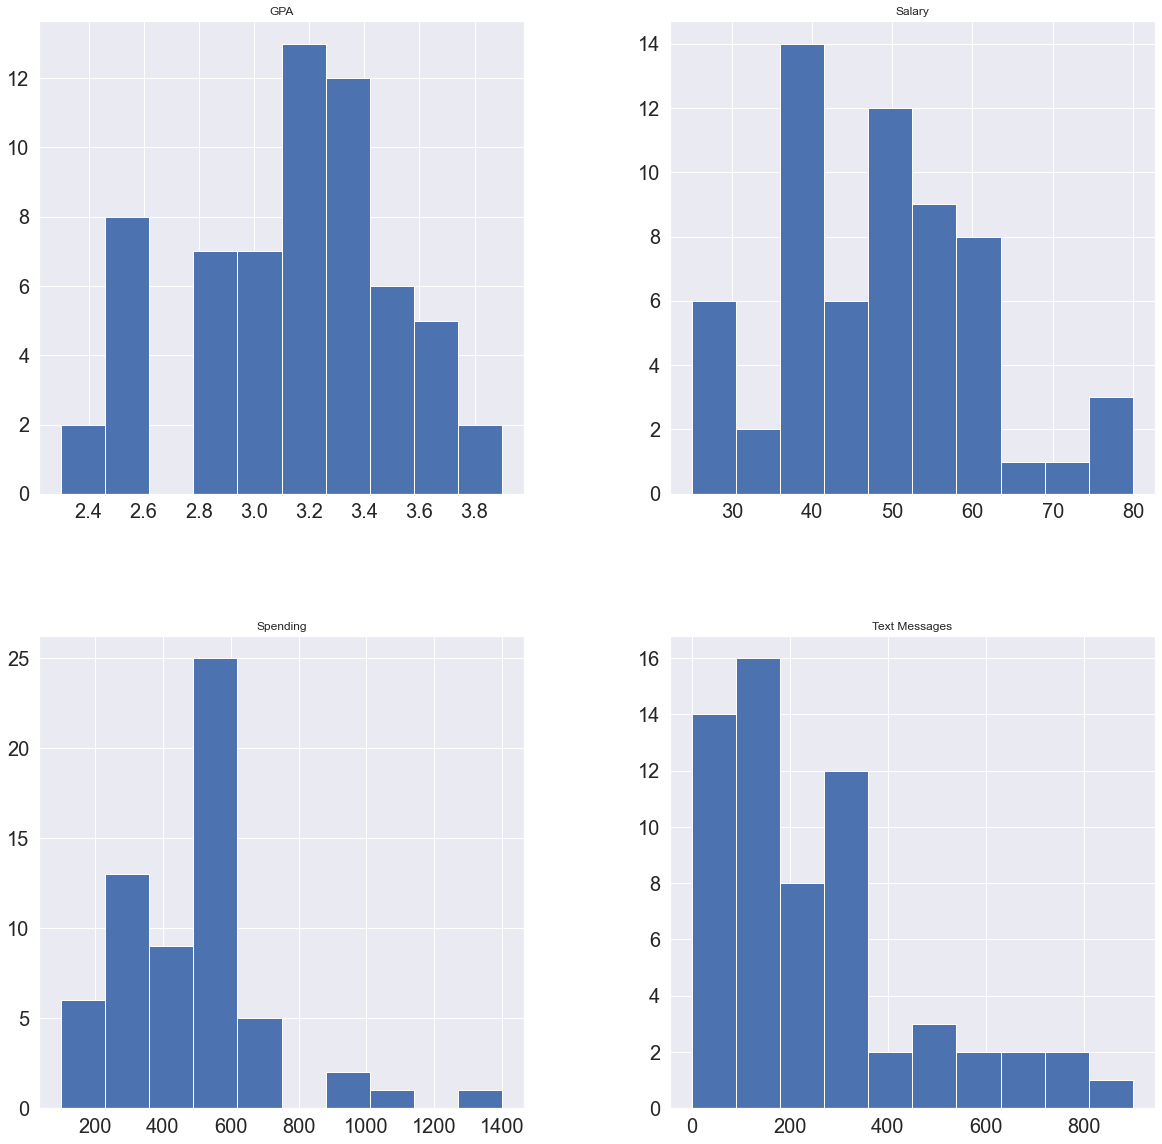

In [62]:
df_survey.hist(column =[ "GPA","Salary", "Spending","Text Messages"] ,xlabelsize=20, ylabelsize = 20, figsize = (20,20));

##### Above histogram shows the four continuous numerical variable in data set.
- GPA shows normal distribution though between 2.6 and 2.8 there are no dtudents. and highest GPA levels are between 3.1 to 3.4
- Talking about Salary highest paid salary is 40 and after that good number of students getting 50 but above that there are very few.
- Spending is highest at 600 and after 600 it has sharp right skewed.
- Text messages are alsosharp rightl skewed being highest between 100 - 200

## Case III


#### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

- The file (A & B shingles.csvView in a new window) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

- 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

- 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [63]:
df_shingles=pd.read_csv("C:\\Users\\archy\\Downloads\\A & B shingles-1.csv")

In [64]:
df_shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [65]:
df_shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [66]:
df_shingles.mean()

A    0.316667
B    0.273548
dtype: float64

## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### Step  1- Define the Null and alternate Hypothesis

- H0 μA = μB != 0.35
- H1 μA = μB = 0.35

### Step 2 - Decide the Significance level

- Here we select  𝛼  = 0.05 and the population standard deviation is not known.

### Step 3 Identify the test Statistics
- As the population standard deviation is unknown we have to perform two sample independent t test to find out if we can reject null hypothesis or will fail to reject i

### Step 4: Calculate the p - value and test statistic
- ** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

- ** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

- For this exercise, we are going to first assume that the variance is equal and then compute the necessary statistical values.

In [67]:
t_stat, p_value  = ttest_ind(df_shingles['A'],df_shingles['B'],equal_var=False, nan_policy="omit")
print('tstat',t_stat)    
p_value = p_value/2
print('P Value',p_value)  

tstat 1.2885080295255027
P Value 0.1011291102510891


## 0.101129 > 0.05

### p_value is greater than the significance level hance we fail to reject the null hypothesis
###  So at 95% confidence level there is sufficient evidence to prove that moisture content in both the type of single are within permissible limit.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Step-1 Define Null And alternate hypothesis
- H0 : μA = μB
- H1 : μA != μB

### Step 2 - Decide the Significance level
- Here we select 𝛼 = 0.05 and the population standard deviation is not known.

In [68]:
# use a sample t test on ind samples
t_stat2, p_value2  = ttest_ind(df_shingles['A'],df_shingles['B'],equal_var=True, nan_policy="omit")
print('tstat',t_stat2)    
p_value2=p_value2/2
print('P Value for one tailed test ',p_value2)  

tstat 1.2896282719661123
P Value for one tailed test  0.1008748285917653


- p_value is greater than alpha, hence we fail to reject null hypothesis

In [69]:
df_shingles.std()

A    0.135731
B    0.137296
dtype: float64

In [70]:
var_a = df_shingles["A"].var(ddof=1)
var_b = df_shingles["B"].var(ddof=1)

In [71]:
# Conbined Standard Deviation of two independent samples -
# which we will use in effect _size for the purpose  of calculating power test.
comb_s = np.sqrt((var_a + var_b)/2)
comb_s

0.13651589600391284

In [72]:
effect_size = (df_shingles["A"].mean()-df_shingles["B"].mean())/comb_s
effect_size

0.31584805016887213

In [73]:
Power =TTestIndPower().solve_power( effect_size= 0.31584,nobs1=36,alpha = 0.05, power = None, ratio = 41.76, alternative = "larger")
Power

0.5898161961724652

In [74]:
print("Power of test is", round((Power)*100,3), '%')

Power of test is 58.982 %


- Power of T test at 95 % interval, and type I error is at 58.982%
- Assumption of Independence: you need two independent, categorical groups that represent your independent variable. In the above example of test scores “A” or “B” would be your independent variable.
- Assumption of normality: the dependent variable should be approximately normally distributed. The dependent variable should also be measured on a continuous scale. In the above example on average test scores, the “test score” would be the dependent variable. Assumption of Homogeneity of Variance: The variances of the dependent variable should be equal.